### Exploration/Analysis of Minneapolis Winter Weather 1880-2020
data sourced from Minnesota DNR

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns


Start with some data cleaning to prepare for analysis.

In [4]:
# Load file
df = pd.read_csv('msp_historical_weather.csv')
# Remove first column
df = df.drop(columns=['Unnamed: 0'])
# Show sample
df.sample()
#Check datatypes
df.dtypes
# check for na's
df.isnull().sum()
# drop where tempature is missing
df = df.loc[150:]
df.sample()
#find and replace T with .01
df = df.replace('T',.01)
# replace missing values with Nan
df = df.replace('M','NaN')
# show sample
df.head()

,Date,MaxTemp,MinTemp,Precip,Snow,SnowDepth,datetime,day,month,year,season
150,1872-12-01,34,19,0.03,NaN,NaN,1872-12-01,1,12,1872,Winter
151,1872-12-02,33,17,0,NaN,NaN,1872-12-02,2,12,1872,Winter
152,1872-12-03,22,13,0,NaN,NaN,1872-12-03,3,12,1872,Winter
153,1872-12-04,35,13,0,NaN,NaN,1872-12-04,4,12,1872,Winter
154,1872-12-05,32,15,0,NaN,NaN,1872-12-05,5,12,1872,Winter


Tempature Trends in Winter

In [5]:
# Make DF just for tempatures
temps = df[['MaxTemp','MinTemp','Date','day','month','year','season','datetime']]
# Convert temps from Objects to Numbers
# Get rid of NaN values
temps=temps[(temps['MaxTemp']!= 'NaN') & (temps['MinTemp'] != 'NaN')]
# Conver MaxTemp and MinTemp to numerical values
temps.MaxTemp=pd.to_numeric(temps.MaxTemp)
temps.MinTemp=pd.to_numeric(temps.MinTemp)
#Apply to numeric ignoring uneeded columns
temps = temps.apply(pd.to_numeric, errors='ignore')
# Check dateatypes to confirm that Temps are Integers
temps.dtypes

MaxTemp      int64
MinTemp      int64
Date        object
day          int64
month        int64
year         int64
season      object
datetime    object
dtype: object

Now add some information to better inform analysis. Found the average Tempature and high and Low Tempatures.

In [6]:
# add column with average tempature
temps['AveTemp'] = (temps['MaxTemp'] + temps['MinTemp']) / 2
# add column with differance between High and Low Temp
temps['HighLowDiff'] = (temps['MaxTemp'] - temps['MinTemp'])
# Show sample 
temps.sample(5)
# subset just winter
winter = temps[temps['season']=='Winter']
winter.sample(5)
# Now just segment out January
jan = winter[winter['month']==1]
# Show sample
jan.sample(5)

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
370,5,-17,1875-01-10,10,1,1875,Winter,1875-01-10,-6.0,22
3176,33,20,1/19/1906,19,1,1906,Winter,1906-01-19,26.5,13
9220,44,31,1/16/1973,16,1,1973,Winter,1973-01-16,37.5,13
9476,34,3,1/2/1976,2,1,1976,Winter,1976-01-02,18.5,31
10394,39,29,1/17/1986,17,1,1986,Winter,1986-01-17,34.0,10


Show sum stats for January

In [7]:
jan.describe()

,MaxTemp,MinTemp,day,month,year,AveTemp,HighLowDiff
count,4588.000000,4588.000000,4588.000000,4588.0,4588.000000,4588.000000,4588.000000
mean,21.820837,4.776373,16.000000,1.0,1946.500000,13.298605,17.044464
std,13.446458,14.620544,8.945247,0.0,42.727601,13.521527,7.603181
min,-20.000000,-41.000000,1.000000,1.0,1873.000000,-29.000000,1.000000
25%,12.000000,-6.000000,8.000000,1.0,1909.750000,3.500000,12.000000
50%,23.000000,5.000000,16.000000,1.0,1946.500000,14.500000,16.000000
75%,32.000000,16.000000,24.000000,1.0,1983.250000,24.000000,21.000000
max,58.000000,42.000000,31.000000,1.0,2020.000000,50.000000,49.000000


# Global Tempature Changes
Has global warming changed the average tempatures in Minneapolis over the last 100 years?


In [10]:
jan.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff
1193,31,-2,1884-01-21,21,1,1884,Winter,1884-01-21,14.5,33


In [11]:
# make df based on dates
#old_times = 
# Old times for years 1890-1920
old_times = jan.query("(year > 1889) and (year < 1921)")
old_times['time'] = '1890-1920'
old_times['split'] = 'old'
# Present for years 1990-1920
present = jan.query("(year > 1989) and (year < 2021)")
present['time']='1990-2020'
present['split']='present'

# concat back into one df
old_and_present = pd.concat([old_times,present])
old_and_present.head()

<ipython-input-11-96ebb24c774d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_times['time'] = '1890-1920'
<ipython-input-11-96ebb24c774d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_times['split'] = 'old'
<ipython-input-11-96ebb24c774d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,time,split
1715,31,10,1890-01-01,1,1,1890,Winter,1890-01-01,20.5,21,1890-1920,old
1716,10,-8,1890-01-02,2,1,1890,Winter,1890-01-02,1.0,18,1890-1920,old
1717,10,-12,1890-01-03,3,1,1890,Winter,1890-01-03,-1.0,22,1890-1920,old
1718,21,10,1890-01-04,4,1,1890,Winter,1890-01-04,15.5,11,1890-1920,old
1719,13,4,1890-01-05,5,1,1890,Winter,1890-01-05,8.5,9,1890-1920,old


Violin Plot of average Tempatures in 1890-1920 time peroid vs 1990-2020 time peroid.

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

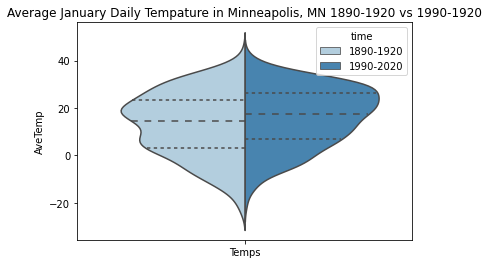

In [12]:
import matplotlib.pyplot as plt
#violin plot
ax = sns.violinplot(x=['Temps']*len(old_and_present),
                    y="AveTemp",hue='time',data=old_and_present,
                    split=True,palette='Blues',inner="quart",)
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')
                    
                   

Box Plot of average Tempatures in 1890-1920 time peroid vs 1990-2020 time peroid.

Text(0.5, 1.0, 'Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

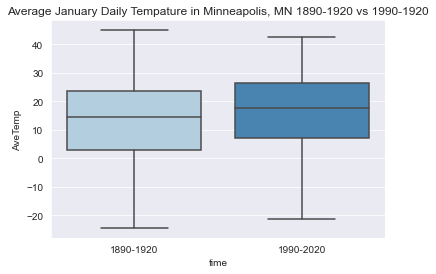

In [13]:
# boxplot
sns.color_palette('deep')
sns.set_style('darkgrid')

ax = sns.boxplot(x="time",y="AveTemp",data=old_and_present,palette='Blues')
plt.title('Average January Daily Tempature in Minneapolis, MN 1890-1920 vs 1990-1920')

Find rempature trend in summer

In [14]:
# query to segment out summer
temps.loc[100:].query("season =='Fall'").groupby('year')['AveTemp'].max()

year
1872    60.0
1873    72.5
1874    79.0
1875    79.0
1876    66.5
        ... 
2016    76.0
2017    83.5
2018    81.0
2019    79.0
2020    73.0
Name: AveTemp, Length: 149, dtype: float64

In [15]:
temps.dtypes

MaxTemp          int64
MinTemp          int64
Date            object
day              int64
month            int64
year             int64
season          object
datetime        object
AveTemp        float64
HighLowDiff      int64
dtype: object

In [17]:
# convert string to catogory
temps['cat'] = temps['season'].astype("category")
temps.dtypes

MaxTemp           int64
MinTemp           int64
Date             object
day               int64
month             int64
year              int64
season           object
datetime         object
AveTemp         float64
HighLowDiff       int64
cat            category
dtype: object

In [18]:
temps.groupby('season').count()

,MaxTemp,MinTemp,Date,day,month,year,datetime,AveTemp,HighLowDiff,cat
season,,,,,,,,,,
Fall,13529,13529,13529,13529,13529,13529,13529,13529,13529,13529
Spring,13615,13615,13615,13615,13615,13615,13615,13615,13615,13615
Summer,13616,13616,13616,13616,13616,13616,13616,13616,13616,13616
Winter,13387,13387,13387,13387,13387,13387,13387,13387,13387,13387


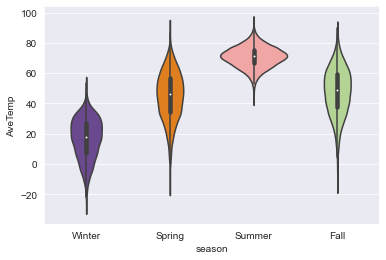

In [19]:
ax=sns.violinplot(x=temps['season'],y=temps['AveTemp'],palette='Paired_r')

tempature patterns in diff seasons

historically what has the tempature been on January 18th?

In [20]:
jan.query("(day == '19') and (month=='1')").mean()

MaxTemp        NaN
MinTemp        NaN
Date           NaN
day            NaN
month          NaN
year           NaN
season         NaN
datetime       NaN
AveTemp        NaN
HighLowDiff    NaN
dtype: object

In [18]:
jan.query("(day == '20') and (month=='1')").mean()

MaxTemp          22.033784
MinTemp           5.479730
day              20.000000
month             1.000000
year           1946.500000
AveTemp          13.756757
HighLowDiff      16.554054
dtype: float64

In [21]:
# query for january from 1970 to present
jan.query("(year > 1969)").describe()

,MaxTemp,MinTemp,day,month,year,AveTemp,HighLowDiff
count,1581.000000,1581.000000,1581.000000,1581.0,1581.000000,1581.000000,1581.000000
mean,22.545857,6.213789,16.000000,1.0,1995.000000,14.379823,16.332068
std,12.917360,14.413947,8.947102,0.0,14.724259,13.164290,7.486387
min,-16.000000,-34.000000,1.000000,1.0,1970.000000,-22.000000,1.000000
25%,13.000000,-5.000000,8.000000,1.0,1982.000000,4.500000,11.000000
50%,24.000000,7.000000,16.000000,1.0,1995.000000,15.500000,15.000000
75%,33.000000,18.000000,24.000000,1.0,2008.000000,25.000000,21.000000
max,57.000000,37.000000,31.000000,1.0,2020.000000,42.500000,49.000000


Yearly Tempature

In [22]:
# query years 1970-2020
df_1970_2020 = temps.query("(year < 2021) and (year > 1969)")
# query years 1920-1970
df_1920_1970 = temps.query("(year < 1970) and (year > 1919)")
# query years 1880 - 2020
df_1880_1920 = temps.query("(year < 1920) and (year > 1970)")


In [23]:
# CHECK NEW DF'S
df_1970_2020.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,cat
53198,78,55,10/20/2003,20,10,2003,Fall,2003-10-20,66.5,23,Fall


### SUPER COLD!!!
Analysis to compare Polar Vortex of 2018 to Upcoming Artic Air Blast.

In [24]:
temps.sample()

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,cat
26033,76,53,5/16/2006,16,5,2006,Spring,2006-05-16,64.5,23,Spring


In [25]:
#pop quiz

temps.query("(year) > 1941 and (month)==2 and (day)==14 and (MinTemp) <0 ").count()

MaxTemp        13
MinTemp        13
Date           13
day            13
month          13
year           13
season         13
datetime       13
AveTemp        13
HighLowDiff    13
cat            13
dtype: int64

In [26]:
# query temps under zero
temps.query("(MaxTemp) < 0")

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,cat
169,-3,-13,1872-12-20,20,12,1872,Winter,1872-12-20,-8.0,10,Winter
170,-10,-23,1872-12-21,21,12,1872,Winter,1872-12-21,-16.5,13,Winter
172,-6,-27,1872-12-23,23,12,1872,Winter,1872-12-23,-16.5,21,Winter
173,-9,-31,1872-12-24,24,12,1872,Winter,1872-12-24,-20.0,22,Winter
176,-2,-24,1872-12-27,27,12,1872,Winter,1872-12-27,-13.0,22,Winter
...,...,...,...,...,...,...,...,...,...,...,...
13385,-13,-28,1/30/2019,30,1,2019,Winter,2019-01-30,-20.5,15,Winter
13386,-3,-23,1/31/2019,31,1,2019,Winter,2019-01-31,-13.0,20,Winter
20630,-3,-17,3/10/1948,10,3,1948,Spring,1948-03-10,-10.0,14,Spring
41316,-1,-13,1872-11-28,28,11,1872,Fall,1872-11-28,-7.0,12,Fall


<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

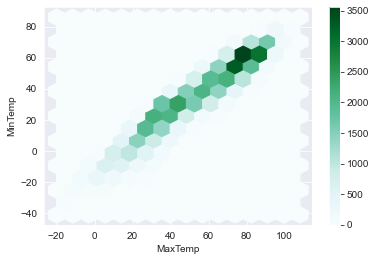

In [27]:
# Hexbin plot

temps.plot(x='MaxTemp', y='MinTemp', kind="hexbin", gridsize=15, sharex=False)

In [28]:
vortex_21_lows
vortex_18_lows

NameError: name 'vortex_21_lows' is not defined

VORTEX 2019

In [29]:
poler_19 = temps.query("(year)== 2019 and (month) > 0 and (month) < 3")#["AveTemp"].plot()

In [30]:
# access by row index
poler_19 = poler_19.loc[[13383, 13384,13385, 13386]]
#poler_19.set_

In [ ]:
# set index to date
#poler_19.set_index("Date")

([<matplotlib.axis.XTick at 0x187c0df9c10>,
 [Text(0, 0, '1/28/2019'),
  Text(1, 0, '1/29/2019'),
  Text(2, 0, '1/30/2019'),
  Text(3, 0, '1/31/2019')])

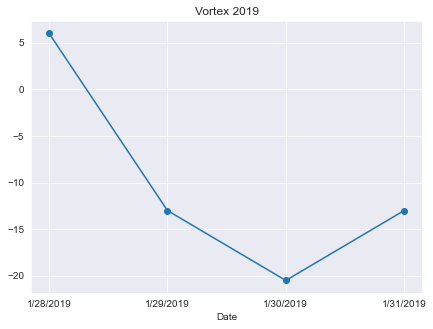

In [32]:
plt.figure();
poler_19.AveTemp.plot(marker='o',grid=True,figsize=(7,5),title= "Vortex 2019")
plt.xticks(range(len(poler_19.index)), poler_19.index)

In [33]:
# Artic Outbreak 2021


highs = [3, -3, 1, 8, 8]
lows = [-12, -16, -10, -8, -6]
dates = ['02/06/2021','02/07/2021','02/08/2021','02/09/2021','02/10/2021','02/11/2021','02/12/2021']

In [35]:
highs = [3, -3, 1, 8, 8]
lows = [-12, -16, -10, -8, -6]
#dates = []


In [36]:
for j in highs:
    print(j)

3
-3
1
8
8


In [37]:
for i in lows:
    print(i)

-12
-16
-10
-8
-6


In [38]:
# find average temps for each day
#(3 + -12)/2
ave = [-4.5,-9.5,-4.5,0,1,-4,-7]
for a in ave:
    print(a)

-4.5
-9.5
-4.5
0
1
-4
-7


In [39]:
ave = [-4.5,-9.5,-4.5,0,1,-4,-7]

Text(0.5, 1.0, 'Arctic Blast 2021')

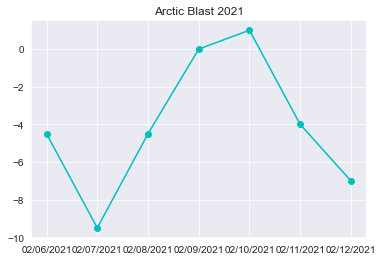

In [45]:
plt.plot(dates,ave, marker = 'o', color = 'c')
plt.title("Arctic Blast 2021")

In [41]:
temps

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,cat
150,34,19,1872-12-01,1,12,1872,Winter,1872-12-01,26.5,15,Winter
151,33,17,1872-12-02,2,12,1872,Winter,1872-12-02,25.0,16,Winter
152,22,13,1872-12-03,3,12,1872,Winter,1872-12-03,17.5,9,Winter
153,35,13,1872-12-04,4,12,1872,Winter,1872-12-04,24.0,22,Winter
154,32,15,1872-12-05,5,12,1872,Winter,1872-12-05,23.5,17,Winter
...,...,...,...,...,...,...,...,...,...,...,...
54782,36,28,11/26/2020,26,11,2020,Fall,2020-11-26,32.0,8,Fall
54783,37,27,11/27/2020,27,11,2020,Fall,2020-11-27,32.0,10,Fall
54784,50,32,11/28/2020,28,11,2020,Fall,2020-11-28,41.0,18,Fall
54785,40,22,11/29/2020,29,11,2020,Fall,2020-11-29,31.0,18,Fall


In [42]:
poler_14 = temps.query("(year)== 2014 and (month) > 0 and (month) < 3 ")
poler_14

,MaxTemp,MinTemp,Date,day,month,year,season,datetime,AveTemp,HighLowDiff,cat
12905,1,-8,1/1/2014,1,1,2014,Winter,2014-01-01,-3.5,9,Winter
12906,4,-10,1/2/2014,2,1,2014,Winter,2014-01-02,-3.0,14,Winter
12907,29,-10,1/3/2014,3,1,2014,Winter,2014-01-03,9.5,39,Winter
12908,35,-2,1/4/2014,4,1,2014,Winter,2014-01-04,16.5,37,Winter
12909,-2,-20,1/5/2014,5,1,2014,Winter,2014-01-05,-11.0,18,Winter
12910,-12,-23,1/6/2014,6,1,2014,Winter,2014-01-06,-17.5,11,Winter
12911,5,-15,1/7/2014,7,1,2014,Winter,2014-01-07,-5.0,20,Winter
12912,4,-11,1/8/2014,8,1,2014,Winter,2014-01-08,-3.5,15,Winter
12913,20,-11,1/9/2014,9,1,2014,Winter,2014-01-09,4.5,31,Winter
12914,31,16,1/10/2014,10,1,2014,Winter,2014-01-10,23.5,15,Winter


Text(0.5, 1.0, '2014')

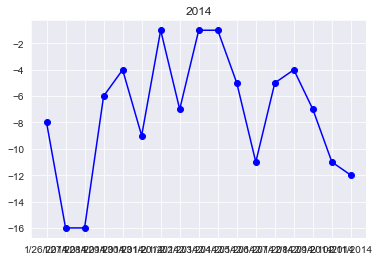

In [44]:
poler_14 = poler_14[25:42:1]
plt.plot( poler_14['Date'],poler_14['MinTemp'], marker = 'o', color = 'b') #rotation = 'verticle')
plt.title("2014")